<a href="https://colab.research.google.com/github/rahul-rajendra-kumar/Machine_Learning/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr,spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

In [ ]:
s = pd.Series([2,6,7,8,8,11,12,13,14,15,22,23])
q1,q2,q3 = s.quantile(q=[0.25,0.5,0.75], interpolation='linear')
iqr = q3-q1
i,j = ((q1-(1.5*iqr)),(q3+(1.5*iqr)))
outlier = [x for x in s if x<i or x>j]
outlier

[]

In [ ]:
s = pd.Series([5,40,42,46,48,49,50,50,52,53,55,56,58,75,102])
q1,q2,q3 = s.quantile(q=[0.25,0.5,0.75], interpolation='linear')
iqr = q3-q1
i,j = ((q1-(1.5*iqr)),(q3+(1.5*iqr)))
outlier = [x for x in s if x<i or x>j]
outlier

[5, 75, 102]

{'boxes': [<matplotlib.lines.Line2D at 0x7f8467fb14a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8467fb1eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8467fbc978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8467fbc5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8467fb17b8>,
  <matplotlib.lines.Line2D at 0x7f8467fb1b38>]}

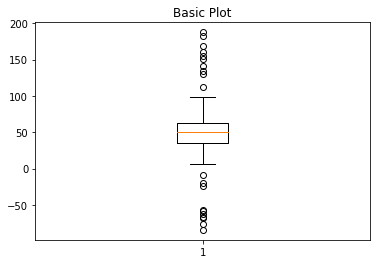

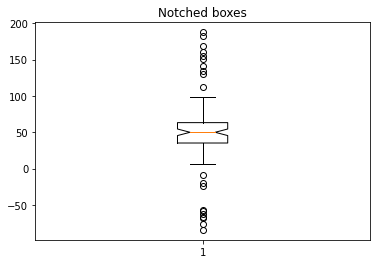

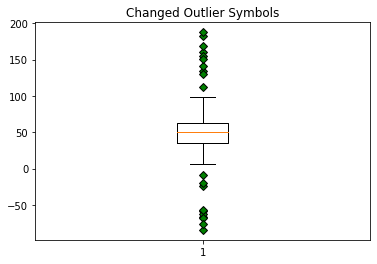

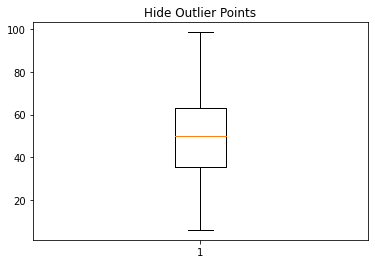

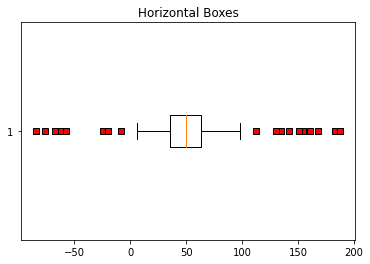

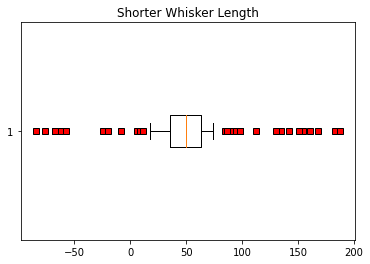

In [ ]:
np.random.seed(123)
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes')
ax2.boxplot(data, notch=True)
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(data, flierprops=green_diamond)

fig4, ax4 = plt.subplots()
ax4.set_title('Hide Outlier Points')
ax4.boxplot(data, showfliers=False)

red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(data, vert=False, flierprops=red_square)

fig6, ax6 = plt.subplots()
ax6.set_title('Shorter Whisker Length')
ax6.boxplot(data, flierprops=red_square, vert=False, whis=0.75)

In [ ]:
x1, y1, x2, y2 = (5,7,10,9)

ecludean_distance = math.sqrt((x2-x1)**2 +(y2-y1)**2)
manhattan_distance = abs(x2-x1)+abs(y2-y1)
(ecludean_distance,manhattan_distance)

(5.385164807134504, 7)

data1: mean=101.391 stdv=19.673
data2: mean=151.935 stdv=22.516


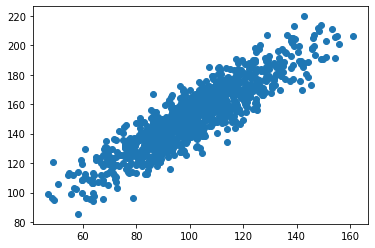

In [ ]:
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))
plt.scatter(data1, data2)
plt.show()

In [ ]:
covariance = np.cov(data1, data2)
covariance

array([[387.40992835, 395.89313965],
       [395.89313965, 507.45717931]])

In [ ]:
# calculate Pearson's correlation
cor, _ = pearsonr(data1, data2)
corr, _ = spearmanr(data1, data2)
(cor,corr)

(0.8928796034702594, 0.8847744927744928)

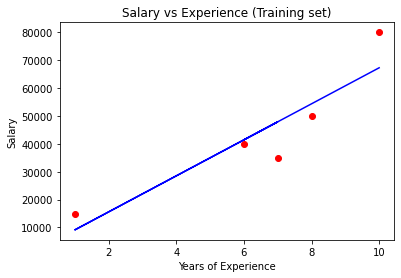

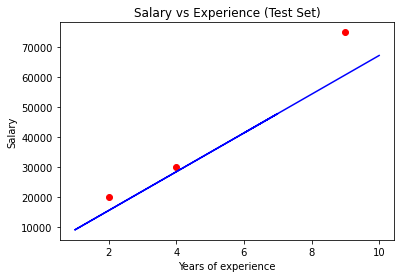

In [ ]:
dataset = pd.DataFrame([[1,	15000],[2,	20000],[4,	30000],[8,	50000],[6,	40000],[7,	35000],[9,	75000],[10,	80000]],columns = ['yearofexperience','salary'])

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

#splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

#Fitting simple Linear Regression to the Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
#Visualising the training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the test set result
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataPath = '/content/drive/My Drive/PROJECTS/diabetes.csv'

Mounted at /content/drive


In [ ]:
pima = pd.read_csv(dataPath)
pima.columns=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[118  12]
 [ 26  36]]
